# Simple classification with CNN

 An example of classification using a convolutional neural network for the famous MNIST dataset

## Objectives :

- Recognizing handwritten numbers
- Understanding the principle of a classifier CNN network 
- Implementation with Keras

The MNIST dataset (Modified National Institute of Standards and Technology) is a must for Deep Learning.It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.

# Step 1 - Init python stuff

In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

from sklearn.metrics import confusion_matrix
import seaborn as sns 

Verbosity during training: 0 = silent, 1 = progress bar, 2 = one line per epoch

In [24]:
fit_verbosity = 1

# Step 2 - Retrieve data

MNIST is one of the most famous historic dataset. Include in Keras datasets.

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test :  (10000, 28, 28, 1)
y_test :  (10000,)


# Step 3 - Preparing the data

In [26]:
print('Before normalization : Min{}, Max{}'.format(x_train.min(), x_train.max()))

xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

print('After normalization : Min{}, Max{}'.format(x_train.min(), x_train.max()))

Before normalization : Min0, Max255
After normalization : Min0.0, Max1.0


## Have a look

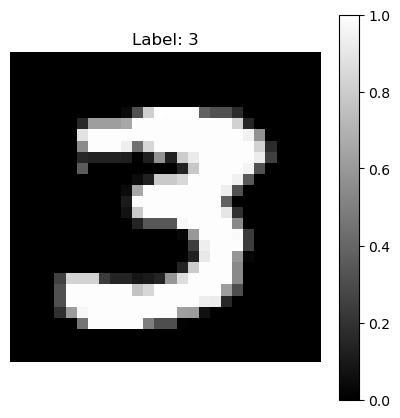

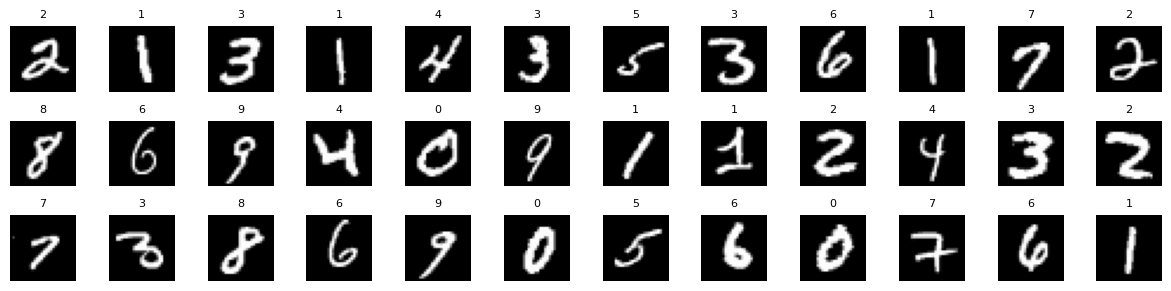

In [27]:
image = x_train[27]
label = y_train[27]

# Création de la figure
plt.figure(figsize=(5, 5))  
plt.imshow(image, cmap='gray') 
plt.colorbar()
plt.title(f'Label: {label}')
plt.axis('off') 

plt.show()

indices = range(5, 41)  
images = x_train[indices]
labels = y_train[indices]

columns = 12
rows = len(indices) // columns + (1 if len(indices) % columns else 0)

fig, axes = plt.subplots(rows, columns, figsize=(12, (rows * 12) / columns))  
axes = axes.flatten()

for ax, img, label in zip(axes, images, labels):
    ax.imshow(img, cmap='gray')  
    ax.set_title(f'{label}', fontsize=8)
    ax.axis('off')

for i in range(len(indices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()

plt.show()


# Step 4 - Create model

In [28]:
model = keras.Sequential()

model.add(keras.layers.Input((28, 28, 1)))

model.add(keras.layers.Conv2D(8, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)         

# Step 5 - Train the model

In [30]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=fit_verbosity)

Epoch 1/16
118/118 [==============================] - 8s 60ms/step - loss: 1.1706 - accuracy: 0.6149 - val_loss: 0.3314 - val_accuracy: 0.9127
Epoch 2/16
118/118 [==============================] - 6s 55ms/step - loss: 0.4533 - accuracy: 0.8609 - val_loss: 0.1928 - val_accuracy: 0.9438
Epoch 3/16
118/118 [==============================] - 6s 54ms/step - loss: 0.3278 - accuracy: 0.9007 - val_loss: 0.1368 - val_accuracy: 0.9582
Epoch 4/16
118/118 [==============================] - 6s 52ms/step - loss: 0.2697 - accuracy: 0.9177 - val_loss: 0.1108 - val_accuracy: 0.9663
Epoch 5/16
118/118 [==============================] - 6s 52ms/step - loss: 0.2286 - accuracy: 0.9308 - val_loss: 0.0957 - val_accuracy: 0.9699
Epoch 6/16
118/118 [==============================] - 6s 52ms/step - loss: 0.2038 - accuracy: 0.9383 - val_loss: 0.0826 - val_accuracy: 0.9738
Epoch 7/16
118/118 [==============================] - 7s 55ms/step - loss: 0.1841 - accuracy: 0.9452 - val_loss: 0.0736 - val_accuracy: 0.9766

# Step 6 - Evaluate 

## 6.1 - Final loss and accuracy

Note : With a DNN, we had a precision of the oreder of : 97.7% so we gained 1% and halved the error rate

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss : 0.0419
Test accuracy : 0.9864


## 6.2 Plot history

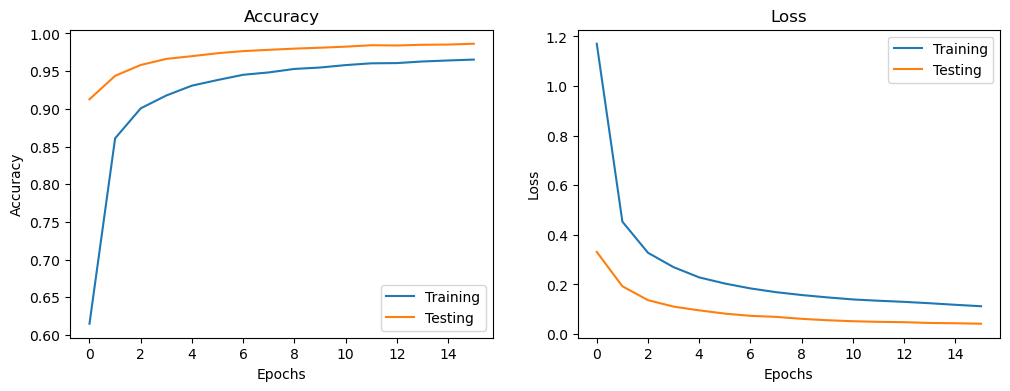

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Testing')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 6.3 - Plot results

313/313 [==============================] - 1s 4ms/step


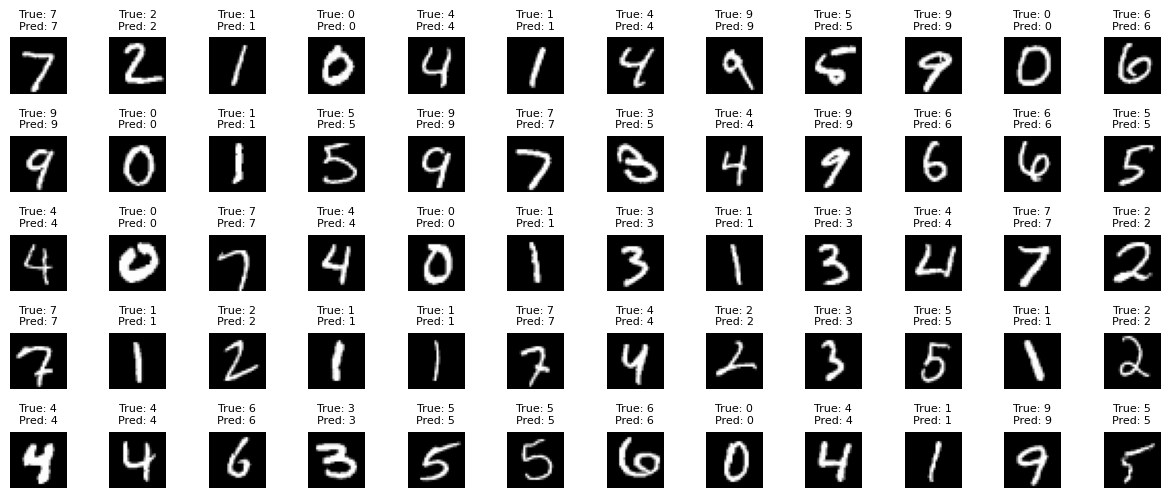

In [38]:
y_sigmoid = model.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=1)

n_images = 60
columns = 12
rows = (n_images + columns - 1) // columns 

x_size = 1
y_size = 1

fig, axes = plt.subplots(rows, columns, figsize=(columns * x_size, rows * y_size))
fig.tight_layout(pad=0.5)

axes = axes.flatten()

for i in range(n_images):
    ax = axes[i]
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}", fontsize=8)
    ax.axis('off')
    
for i in range(n_images, len(axes)):
    axes[i].axis('off')

plt.show()

## 6.4 - Plot some errors

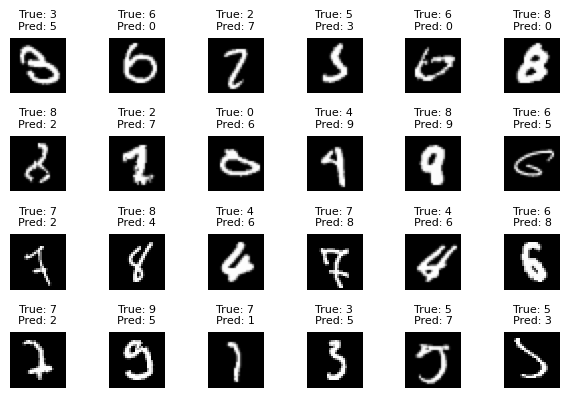

In [36]:
errors = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
errors = errors[:min(24, len(errors))]

n_images = len(errors)
columns = 6
rows = (n_images + columns - 1) // columns

x_size = 1
y_size = 1

fig, axes = plt.subplots(rows, columns, figsize=(columns * x_size, rows * y_size))
fig.tight_layout(pad=0.5)

axes = axes.flatten()

for i in range(n_images):
    ax = axes[i]
    ax.imshow(x_test[errors[i]], cmap='gray')
    ax.set_title(f"True: {y_test[errors[i]]}\nPred: {y_pred[errors[i]]}", fontsize=8)
    ax.axis('off')
    
for i in range(n_images, len(axes)):
    axes[i].axis('off')
    
plt.show()

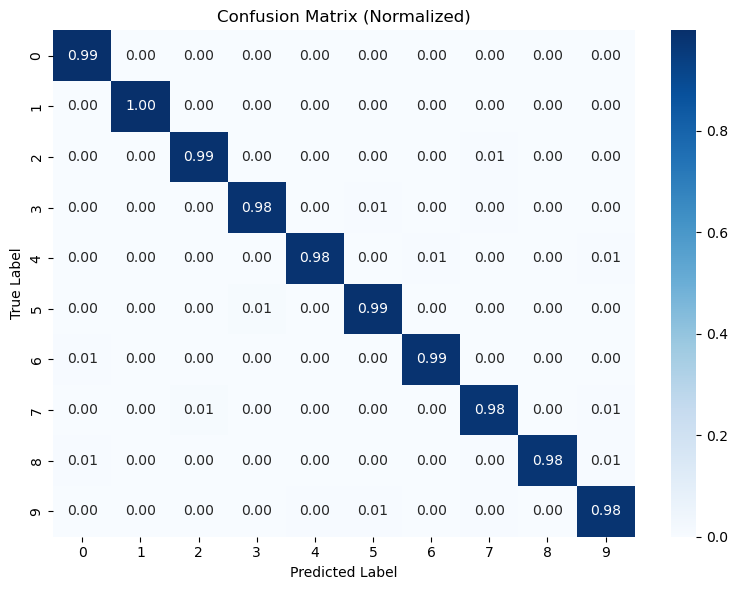

In [35]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normalisation de la matrice de confusion
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Définition des étiquettes pour les axes
labels = range(10)  

# Création de la figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True, xticklabels=labels, yticklabels=labels)

# Titre et étiquettes
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Ajustement des détails de la figure
plt.tight_layout()

plt.show()